In [3]:
from guidedstats import Visualizer as plot # here we rename to plot but can be anything
import pandas as pd

df = pd.read_csv("test.csv")
a = plot(df)

In [4]:
a

Visualizer(builtinSteps=['LoadDatasetStep', 'VariableSelectionStep', 'DataTransformationStep', 'AssumptionChec…

In [3]:
a.addWorkFlow({"new":"RegressionFlow"})

TypeError: RegressionFlow.__init__() got an unexpected keyword argument 'datasetName'

In [3]:
a.workflowInfo

{'workflowName': 'Regression workflow',
 'currentStepId': 0,
 'steps': [{'stepId': 0,
   'stepName': 'step',
   'stepType': 'LoadDatasetStep',
   'done': True,
   'isShown': False,
   'config': {}},
  {'stepId': 1,
   'stepName': 'Select Dependent Variable',
   'stepType': 'VariableSelectionStep',
   'done': False,
   'isShown': False,
   'config': {'variableName': 'dependent variable'}},
  {'stepId': 2,
   'stepName': 'Check Outliers',
   'stepType': 'AssumptionCheckingStep',
   'done': False,
   'isShown': False,
   'config': {}},
  {'stepId': 3,
   'stepName': 'Select Independent Variables',
   'stepType': 'VariableSelectionStep',
   'done': False,
   'isShown': False,
   'config': {'metric': 'pearson', 'variableName': 'independent variables'}},
  {'stepId': 4,
   'stepName': 'Check Outliers',
   'stepType': 'AssumptionCheckingStep',
   'done': False,
   'isShown': False,
   'config': {}},
  {'stepId': 5,
   'stepName': 'Do train test split',
   'stepType': 'TrainTestSplitStep',
   

In [15]:
a.createDAGData()

0
[]
1
1
[]
1
2
[]
1
3
[]
1
4
[1]
1
5
[]
0
6
[]
0
7
[]
0


In [3]:
a.defineStep("clean data",lambda row: row["attention"])

In [6]:
a.builtinSteps

['LoadDatasetStep',
 'VariableSelectionStep',
 'ColumnTransformationStep',
 'AssumptionCheckingStep',
 'TrainTestSplitStep',
 'ModelStep',
 'EvaluationStep',
 'clean data']

## Bare code
- Linear Layout, cannot directly see the dependency, the dependency 
- Hard to replicate
- usually one source of code may not satisfy the demand of the current case, how to generalize?
- how to generalize to current case

In [ ]:
#check outlier
# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

In [ ]:
import statsmodels.api as sm
import pandas as pd
 
# reading data from the csv
data = pd.read_csv('train.csv')
 
# defining the variables
x = data['x'].tolist()
y = data['y'].tolist()
 
# adding the constant term
x = sm.add_constant(x)

# no train_test_split
# no hyper
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

In [ ]:
#join test dataset for altair visualization
Y_hat = model.predict(X).reshape((-1))
testDataset = pd.DataFrame({"Predicted":Y_hat,"True":Y.to_numpy().reshape((-1))})

# Scatter plot of Predicted vs True
plt.scatter(testDataset["Predicted"], testDataset["True"], label='Data', color='blue')

# Add a diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  np.max([plt.xlim(), plt.ylim()])]  # limits for x and y axis
plt.plot(limits, limits, color='red', label='Baseline')  # Draw baseline

# Set labels and title
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Predicted vs True Values")
plt.legend(loc='best')

# Display the plot
plt.show()

In [6]:
from guidedstats.workflow import RegressionFlow
import pandas as pd
df = pd.read_csv("test.csv")
workflow = RegressionFlow(df,"regression")

Hey, welcome to GuidedStats. In the following parts, we will guide you to perform regression
------------ Step 1 ------------
Loading the dataset
------------ Step 2 ------------
Great job! Now you need to select dependent variable
Please select from below: 
  1. usd_pledged  
  2. staff_pick  
  3. category  
  4. spotlight  
  5. name_len_clean  
  6. blurb_len_clean  
  7. created_at_weekday  
  8. created_at_hr  
  9. created_at_day  
  10. created_at_month  
  11. created_at_yr  
  12. launched_at_weekday  
  13. launched_at_hr  
  14. launched_at_day  
  15. launched_at_month  
  16. launched_at_yr  
  17. deadline_weekday  
  18. deadline_hr  
  19. deadline_day  
  20. deadline_month  
  21. deadline_yr  
  22. create_to_launch_days  
  23. launch_to_deadline_days  
  24. launch_to_state_change_days  
  25. SuccessfulBool  
  26. usd_goal  
  27. region  
  28. log_usd_pledged  
Input the number of column for dependent variable, type STOP to stop   28
------------ Step 3 ------

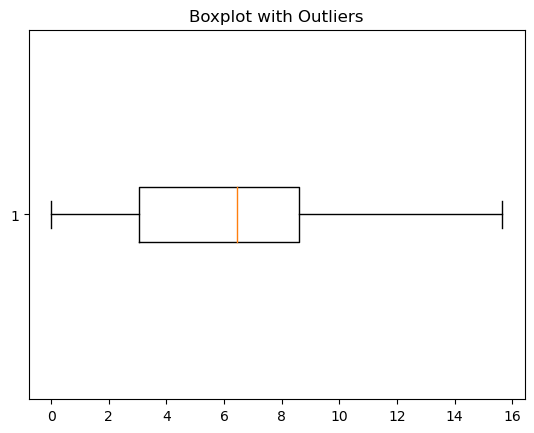

There are 0 outliers fall outside of the 'interquartile range' (IQR)  
Should we proceed or not? Type y or ny
------------ Step 4 ------------
Great job! Now you need to select independent variables
We find the following variable(s) have the highest pearson
  1. SuccessfulBool  
  2. usd_pledged  
  3. name_len_clean  
  4. create_to_launch_days  
  5. launched_at_hr  
  6. launch_to_state_change_days  
  7. created_at_yr  
  8. deadline_yr  
  9. launched_at_yr  
  10. blurb_len_clean  
  11. deadline_hr  
  12. usd_goal  
  13. deadline_month  
  14. launched_at_month  
  15. launch_to_deadline_days  
Input the number of column for independent variables, type STOP to stop   1
Input the number of column for independent variables, type STOP to stop   3
Input the number of column for independent variables, type STOP to stop   4
------------ Step 5 ------------
Done! Now we move to assumption checking stage!
******Outliers Checking******
Result of SuccessfulBool


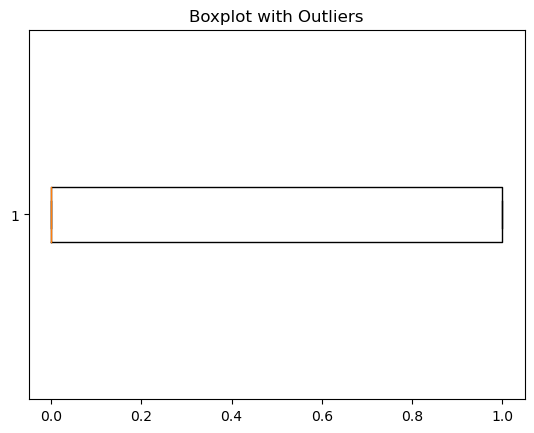

There are 0 outliers fall outside of the 'interquartile range' (IQR)  
Result of name_len_clean


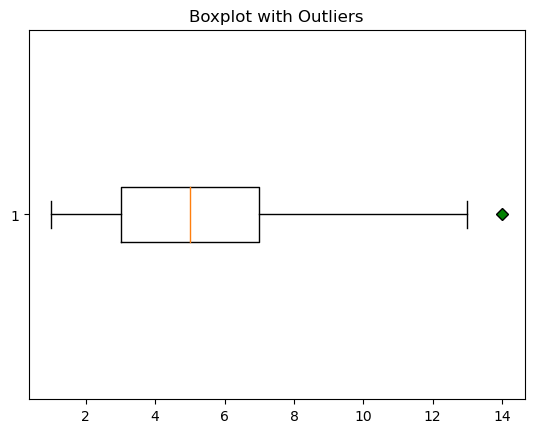

There are 1 outliers fall outside of the 'interquartile range' (IQR)  
Result of create_to_launch_days


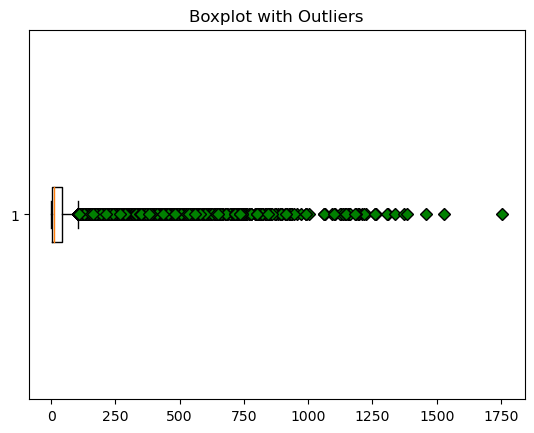

There are 2137 outliers fall outside of the 'interquartile range' (IQR)  
Should we proceed or not? Type y or ny
------------ Step 6 ------------
Great! Now you need to perform the Train Test Split!
Input the train size between 0 to 1, 0.8 is suggested   0.8
Input the validation size between 0 to 0.2   0.1
------------ Step 7 ------------
------------ Step 8 ------------


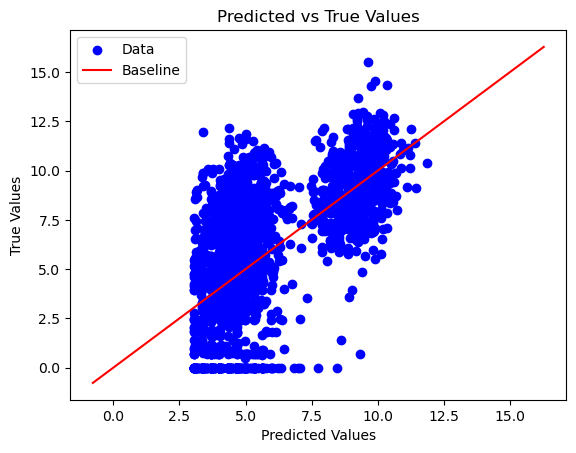

In [7]:
workflow.startGuiding()

In [5]:
import numpy as np
df["log_usd_pledged"] = np.log(df["usd_pledged"] + 1)

In [7]:
df.to_csv("test.csv",index=False)

In [53]:
from guidedstats import step
import pandas as pd

In [54]:
df = pd.read_csv("test.csv")

In [55]:
selectDependent = step.VariableSelectionStep("dependent")

In [56]:
outputs = selectDependent.forward(df)
Y = outputs["dataset"]

Great job! Now you need to select dependent
Please select from below: 
  1. usd_pledged  
  2. staff_pick  
  3. category  
  4. spotlight  
  5. name_len_clean  
  6. blurb_len_clean  
  7. created_at_weekday  
  8. created_at_hr  
  9. created_at_day  
  10. created_at_month  
  11. created_at_yr  
  12. launched_at_weekday  
  13. launched_at_hr  
  14. launched_at_day  
  15. launched_at_month  
  16. launched_at_yr  
  17. deadline_weekday  
  18. deadline_hr  
  19. deadline_day  
  20. deadline_month  
  21. deadline_yr  
  22. create_to_launch_days  
  23. launch_to_deadline_days  
  24. launch_to_state_change_days  
  25. SuccessfulBool  
  26. usd_goal  
  27. region  
  28. log_usd_pledged  
Input the number of column for dependent, type STOP to stop   28


In [57]:
selectIndependent = step.VariableSelectionStep("independent",3,12,compare=True,metricName="pearson")

In [58]:
outputs = selectIndependent.forward(df,Y)
X = outputs["dataset"]

Great job! Now you need to select independent
We find the following variable(s) have the highest pearson
  1. SuccessfulBool  
  2. usd_pledged  
  3. name_len_clean  
  4. create_to_launch_days  
  5. launched_at_hr  
  6. launch_to_state_change_days  
  7. created_at_yr  
  8. deadline_yr  
  9. launched_at_yr  
  10. blurb_len_clean  
  11. deadline_hr  
  12. usd_goal  
Input the number of column for independent, type STOP to stop   1
Input the number of column for independent, type STOP to stop   2
Input the number of column for independent, type STOP to stop   3


In [75]:
test = TrainTestSplitStep()

In [76]:
test.forward(X,Y)

Great! Now you need to perform the Train Test Split!
Input the train size between 0 to 1, 0.8 is suggested   0.8
Input the validation size between 0 to 0.2   0.1


{'XTrain':        SuccessfulBool   usd_pledged  name_len_clean
 12027               1  89408.990000             4.0
 4138                1  46715.000000             4.0
 3416                0    153.356767             5.0
 16456               0      0.000000             4.0
 12547               1   4141.000000             6.0
 ...               ...           ...             ...
 683                 1   6830.000000             5.0
 310                 0     15.741363             4.0
 18582               0     96.321742             5.0
 13617               0     96.000000             2.0
 14898               0   8460.000000             6.0
 
 [14990 rows x 3 columns],
 'XVal':        SuccessfulBool    usd_pledged  name_len_clean
 17845               1   30937.664054             8.0
 14636               0       0.000000             3.0
 14189               1  400787.500000             9.0
 14736               0      11.000000             6.0
 1872                0       0.000000          

In [25]:
split = step.TrainTestSplitStep()

In [26]:
outputs = split.forward(X,Y)
XTrain = outputs["XTrain"]
XTest = outputs["XTest"]
yTrain = outputs["yTrain"]
yTest = outputs["yTest"]

Great! Now you need to perform the Train Test Split!
Input the train size between 0 to 1, 0.8 is suggested   0.8


In [30]:
import numpy as np
import statsmodels.api as sm

# create some example data
np.random.seed(0)
n_samples = 100
X = np.random.normal(size=(n_samples, 3))
# Assuming that our model is Y = 1*X0 + 2*X1 + 3*X2 + noise
Y = X[:, 0] + 2*X[:, 1] + 3*X[:, 2] + np.random.normal(size=n_samples)

# Note the difference in argument order
# optionally, you can add constant to the model like this
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X)
results = model.fit()

# print the p-values for the model coefficients
print(results.pvalues)


[6.22951959e-02 3.32950678e-17 2.54927059e-36 4.86169979e-52]


In [33]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influe

In [50]:
results.rsquared_adj

0.9385741361403763

In [10]:
outputs = modelStep.forward(XTrain,yTrain)
model = outputs["model"]

In [11]:
evaluation = step.EvaluationStep()

In [12]:
outputs = evaluation.forward(model,XTest,yTest)
outputs["visualization"]

alt.LayerChart(...)